In [1]:
!pip3 install imutils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
_URL = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

824887076/824887076 [==============================] - 5s 0us/step


In [3]:
zip_dir

'/root/.keras/datasets/cats_and_dogs.zip'

In [4]:
%%capture
!unzip /root/.keras/datasets/cats_and_dogs.zip;

In [5]:
!ls

 CDLA-Permissive-2.0.pdf   drive   PetImages  'readme[1].txt'   sample_data


In [6]:
IMG_SIZE = 224
INIT_LR = 1e-4
BS = 256
EPOCHS = 4

In [7]:
train = ImageDataGenerator(
rescale = 1./255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
rotation_range=40, 
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split=0.2)

In [8]:
dest = 'PetImages'

In [9]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

In [10]:
path = Path('PetImages/Cat').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

PetImages/Cat/666.jpg


In [11]:
import os
try: 
    os.remove("PetImages/Cat/666.jpg")
    print("removed")
except:
  print("can't remove") 
  pass

removed


In [12]:
path = Path('PetImages/Dog').rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

PetImages/Dog/11702.jpg


In [13]:
import os
try: 
    os.remove("PetImages/Dog/11702.jpg")
    print("removed")
except:
  print("can't remove") 
  pass

removed


In [14]:
trainset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "training",
class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [15]:
validset = train.flow_from_directory(dest,
target_size = (IMG_SIZE,IMG_SIZE),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = "validation",
class_mode='categorical')

Found 4998 images belonging to 2 classes.


In [16]:
NUM_CLASSES = 2

In [17]:
baseModel = Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(IMG_SIZE,IMG_SIZE, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.8)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False


print("[INFO] copilando o modelo...")
opt = Adam()
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

print("[INFO] treinado...")

83683744/83683744 [==============================] - 0s 0us/step
[INFO] copilando o modelo...
[INFO] treinado...


In [18]:
H = model.fit_generator(
	trainset,
  validation_data = validset,
	epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/4
79/79 [==============================] - 3549s 45s/step - loss: 1.0228 - accuracy: 0.5697 - val_loss: 0.6435 - val_accuracy: 0.8121
Epoch 2/4
79/79 [==============================] - 3566s 45s/step - loss: 0.6569 - accuracy: 0.5745 - val_loss: 0.6078 - val_accuracy: 0.8880
Epoch 3/4
79/79 [==============================] - 3538s 45s/step - loss: 0.6297 - accuracy: 0.6276 - val_loss: 0.5604 - val_accuracy: 0.9006
Epoch 4/4
79/79 [==============================] - 3535s 45s/step - loss: 0.6160 - accuracy: 0.6417 - val_loss: 0.5341 - val_accuracy: 0.9096


In [19]:
print("[INFO] salvando o modelo do detector de máscara...")
model.save('cat_dog', save_format="h5")

[INFO] salvando o modelo do detector de máscara...


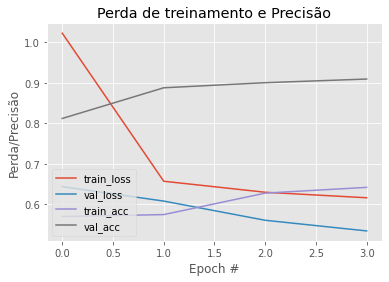

<Figure size 432x288 with 0 Axes>

In [20]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Perda de treinamento e Precisão")
plt.xlabel("Epoch #")
plt.ylabel("Perda/Precisão")
plt.legend(loc="lower left")
plt.show()
plt.savefig('graph.png')